In [62]:
import numpy as np
from numpy.random import random as rand
from tqdm import tqdm 
# Parameters setting
# 蝙蝠数量 N_pop: population size, typically 10 to 40
# 学习的迭代次数 N_gen: number of generation
# 蝙蝠响度 A: loudness (constant or decreasing)
# 蝙蝠频度 r: pulse rate (constant or decreasing)
# This frequency range determines the scalings
# You should change these values if necessary
# 频率最小值 Qmin: frequency minmum
# 频率最大值 Qmax: frequency maxmum
# 每只蝙蝠的位置参数 d: number of dimensions
# 随机采样范围下限 lower: lower bound
# 随机采样范围上限 upper: upper bound

def bat_algorithm(objfun, N_pop=20, N_gen=1000, A=0.5, r=0.5,
    Qmin=0, Qmax=2, d=15, lower=-2, upper=2):
 
    N_iter = 0 # Total number of function evaluations
    # Limit bounds
    Lower_bound = lower * np.ones((1,d))#1*d，用来给蝙蝠d个维度设置参数的随机采样下界
    Upper_bound = upper * np.ones((1,d))#1*d，用来给蝙蝠d个维度设置参数的随机采样上界
 
    Q = np.zeros((N_pop, 1)) # 蝙蝠数量*1，蝙蝠目前的频率
    v = np.zeros((N_pop, d)) # 蝙蝠数量*d，蝙蝠目前的速度
    S = np.zeros((N_pop, d)) # 蝙蝠数量*d，蝙蝠目前的位置
 
    # 初始化蝙蝠种群 Initialize the population/soutions
    # Sol = np.random.uniform(Lower_bound, Upper_bound, (N_pop, d))
    # Fitness = objfun(Sol)
    Sol = np.zeros((N_pop, d))#蝙蝠数量*规模数量，初始化，表达通过随机参数的设定，拥有d个维度位置参数的蝙蝠
    Fitness = np.zeros((N_pop, 1))# 蝙蝠数量*1，初始化，表达最小误差情况下的值的函数，执行转换误差映射的是objfun函数，令其f()
    for i in range(N_pop):#再所有蝙蝠里对每一只蝙蝠迭代
        Sol[i] = np.random.uniform(Lower_bound, Upper_bound, (1, d))#1*规模数量，随机从上下界中内抽取随机数字，定义蝙蝠位置
        Fitness[i] = objfun(Sol[i])#将每次迭代出来的i行映射给objfun函数，赋值给Fitness的i行，Fitness衡量误差大小
 
    # 找到最佳的位置Find the initial best solution
    fmin = min(Fitness)#将Fitness一组数据中最小的值赋给fmin，fmin用来临时储存整个种群中最小误差值
    Index = list(Fitness).index(fmin)#将Fitness列表中最小值的位置赋值给Index
    best = Sol[Index]#将Sol中对应fmin的位置的那一行称作best，这一行是最初始蝙蝠的储存蝙蝠最佳位置参数
 
    # 开始迭代Start the iterations
    for t in tqdm(range(N_gen)):#循环N_gen次，N_gen为期望的学习次数
 
        # 循环所有蝙蝠 Loop over all bats/solutions
        for i in range(N_pop):#逐一对不同蝙蝠进行迭代
            # 含有随机变量的公式 Q[i] = Qmin + (Qmin - Qmax) * np.random.rand
            Q[i] = np.random.uniform(Qmin, Qmax)#定义i个的蝙蝠频率，为每一个蝙蝠设定的频率最大最小值中的一个随机数
            v[i] = v[i] + (Sol[i] - best) * Q[i]#更新i个蝙蝠速度
            S[i] = Sol[i] + v[i]#更新第i个蝙蝠的位置参数
            # ？？？？？？？Apply simple bounds/limits
            Sol[i] = simplebounds(Sol[i], Lower_bound, Upper_bound)#？？？？？？？
            # 蝙蝠频度 Pulse rate
            if rand() > r:#如果随机数大于给定的蝙蝠频度执行操作，如果没有跳过
                #用系数0.001限制随机游走 The factor 0.001 limits the step sizes of random walks
                S[i] = best + 0.001*np.random.randn(1, d)#用此公式更新目前第i个蝙蝠的目前位置，为best的位置+随机数
 
            # 从单个蝙蝠角度评估这一次BA迭代后的结论 Evaluate new solutions
            # print(i)
            Fnew = objfun(S[i])#将第i个蝙蝠的位置向量映射给objfun得到新的f(新位置),最终赋值给Fnew
            #如果蝙蝠位置改良了进那么进行第i个蝙蝠的位置更新 Update if the solution improves, or not too loud
            if (Fnew <= Fitness[i]) and (rand() < A):#如果新的位置确实变得更好了,即f(新位置)确实变小了
                Sol[i] = S[i]#用这一只蝙蝠新的位置取代旧的位置
                Fitness[i] = Fnew#用这一只蝙蝠新的f(新位置)取代旧的f(旧位置)
 
            # 从种群角度更新结论 update the current best solution
            if Fnew <= fmin:#如果这第i个蝙蝠的f(新位置)比原来种群中所有蝙蝠的f(位置)都要小的话做以下操作
                best = S[i]#将蝙蝠种群中的这第i个新的蝙蝠参数作为best
                fmin = Fnew#用这一只蝙蝠新的f(新位置)取代种群中的fmin，作为目前种群中的误差最小值
#                 print(fmin)
#                 print('-----------------')
 
        N_iter = N_iter + N_pop#代表了进行了多少次的BA算法，每循环一次累加一次蝙蝠数量，例如，循环4次20只蝙蝠就是80
 
    print('Number of evaluations: ', N_iter)#打印BA的次数
    print("Best = ", best, '\n fmin = ', fmin)#打印最佳蝙蝠最佳的位置参数和最小的误差
    return best#此函数返回最优的蝙蝠位置参数
 
 
def simplebounds(s, Lower_bound, Upper_bound):#定义？？？？？？？
 
    Index = s > Lower_bound
    s = Index * s + ~Index * Lower_bound
    Index = s < Upper_bound
    s = Index * s + ~Index * Upper_bound
 
    return s

In [63]:
import numpy as np
import pandas as pd
data = pd.read_csv(r"dataset/boston.csv")
data

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [64]:
new_columns = data.columns.insert(0, "Intercept")
t= data.reindex(columns=new_columns, fill_value=1)
X=t.iloc[:400,:-1]
y=t.iloc[:400, -1]
X=np.asarray(X) 
y=np.asarray(y)
X_test=t.iloc[400:,:-1]
y_test=t.iloc[400:, -1]
X.shape

(400, 15)

In [65]:
def function(W):
    sum2=0
    for i in range(X.shape[0]):
        sum1=0
        for j in range(W.size):
            sum1=sum1+X[i][j]*W[j]
        error=sum1-y[i]
        sqr_error=error**2
        sum2=sum2+sqr_error
    output=1/2*sum2
    mse=((error)**2)/X.shape[0]
    return output

100%|██████████| 2000/2000 [25:08<00:00,  1.33it/s]

Number of evaluations:  400000
Best =  [ 0.41398944  0.00989506 -0.20323738  0.07132811 -0.13707578  0.21585964
 -0.19610035  0.12662108  0.11089226 -0.24514452 -0.17336897  0.00685843
  0.18799625  0.05497969 -0.86308522] 
 fmin =  8982.176536021212


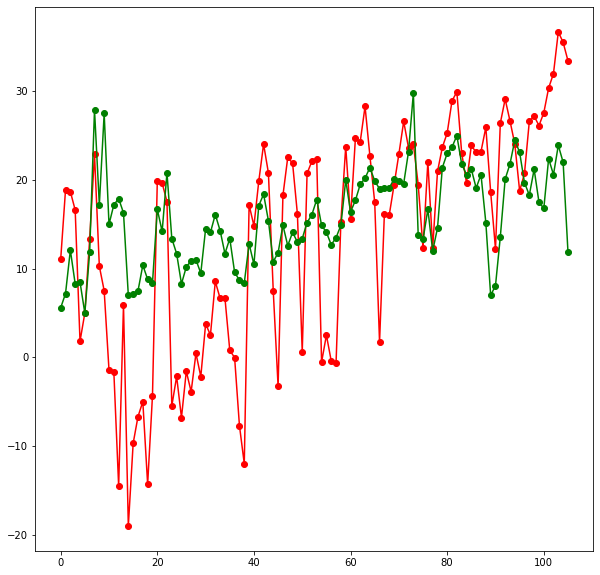

In [89]:
Best=bat_algorithm(function, N_pop=200, N_gen=2000, A=0.5, r=0.5,Qmin=0, Qmax=2, d=15, lower=-1, upper=1)
asd=np.asarray(X_test)
yuce=asd.dot(Best)
import matplotlib as mpl
import matplotlib.pyplot as plt
zhenshi=np.asarray(y_test)
plt.figure(figsize=(10,10))
plt.plot(yuce, 'ro-',label='预测值')  # 红色圆圈表示"不带"权重鱼的预测值
plt.plot(zhenshi, 'go-',label='真实值') # 绿色圆圈表示测试集真实值
plt.show()